# Deep Learning w PyTorch IV (mnist, mlp)
- Part 1: ...

## 1. Introduction
The following notebook briefly demonstrates how the previously introduced methodology can be applied to the [mnist data](https://en.wikipedia.org/wiki/MNIST_database). It is just to show briefly how to fit a basic model before moving on to inference, validation and other topics.

The objective is to identify the handwritten number using a multilayer perceptron neural network with PyTorch

In [1]:
# torch imports
import torch
from torch import nn
from torchvision import datasets, transforms
from torch import optim

# visualizations
import helper
%matplotlib inline

## 2. The Data
Import the data from `datasets.MNIST()`, define a transformation to normalize the data, use `DataLoader()` for importing a batch of images

In [2]:
# Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])

# Download Data 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', 
                          download=True, 
                          train=True, 
                          transform=transform)

# Define DataLoader
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=64, 
                                          shuffle=True)

## 3. The Model
- Define a multilayer perceptron neural network: `model = nn.Sequential(...)`
- Define loss function: `criterion = nn.NLLLoss()` 
- Define optimizer: `optimizer = optim.SGD(...)`
- use a for-loop: `for e in range(epochs): ...` that tracks the `running_loss = 0`
 - load images `for images, labels in trainloader:`
 - flatten images`images = images.reshape(images.shape[0], -1)
 - set gradients to zero: `optimizer.zero_grad()`
 - forward pass: `output = model.forward(iamges)`
 - calculate loss: `loss = criterion(output, labels)`
 - calculate gradients of loss function: `loss.backward()`
 - take one step towards steepest descent: `optimizer.step()`
- Add loss to running_loss: `running_loss += loss.item()

In [3]:
# Parameters
epochs = 20

# Model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                      
# criterion
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

# Gradient descent
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1)
        optimizer.zero_grad()
        
        # forward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        
        # backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch: {}/{}".format(e+1, epochs))
        train_loss = running_loss / len(trainloader)
        print(f"Training loss:", round(train_loss,4))

Epoch: 1/20
Training loss: 0.3436
Epoch: 2/20
Training loss: 0.1878
Epoch: 3/20
Training loss: 0.1603
Epoch: 4/20
Training loss: 0.1434
Epoch: 5/20
Training loss: 0.1405
Epoch: 6/20
Training loss: 0.1279
Epoch: 7/20
Training loss: 0.1248
Epoch: 8/20
Training loss: 0.1162
Epoch: 9/20
Training loss: 0.1118
Epoch: 10/20
Training loss: 0.1116
Epoch: 11/20
Training loss: 0.1089
Epoch: 12/20
Training loss: 0.1018
Epoch: 13/20
Training loss: 0.1015
Epoch: 14/20
Training loss: 0.0949
Epoch: 15/20
Training loss: 0.0938
Epoch: 16/20
Training loss: 0.0907
Epoch: 17/20
Training loss: 0.0912
Epoch: 18/20
Training loss: 0.0888
Epoch: 19/20
Training loss: 0.0879
Epoch: 20/20
Training loss: 0.0926


In [4]:
# Parameters
epochs = 20

# Model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                      
# criterion
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.005)

# Gradient descent
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1)
        optimizer.zero_grad()
        
        # forward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        
        # backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch: {}/{}".format(e+1, epochs))
        train_loss = running_loss / len(trainloader)
        print(f"Training loss:", round(train_loss,4))

Epoch: 1/20
Training loss: 1.4581
Epoch: 2/20
Training loss: 0.5233
Epoch: 3/20
Training loss: 0.3928
Epoch: 4/20
Training loss: 0.3486
Epoch: 5/20
Training loss: 0.3236
Epoch: 6/20
Training loss: 0.3059
Epoch: 7/20
Training loss: 0.2921
Epoch: 8/20
Training loss: 0.2794
Epoch: 9/20
Training loss: 0.2688
Epoch: 10/20
Training loss: 0.2584
Epoch: 11/20
Training loss: 0.2479
Epoch: 12/20
Training loss: 0.2383
Epoch: 13/20
Training loss: 0.2289
Epoch: 14/20
Training loss: 0.2196
Epoch: 15/20
Training loss: 0.2109
Epoch: 16/20
Training loss: 0.2028
Epoch: 17/20
Training loss: 0.1945
Epoch: 18/20
Training loss: 0.1868
Epoch: 19/20
Training loss: 0.1798
Epoch: 20/20
Training loss: 0.1733


## 4. Results
Next, we'll check the predictions of this model. We'll turn off gradients to speed this process up and we don't need them here anyway. We can do this temporarily with:
```python
with torch.no_grad():
    logps = model.forward(img)
```
The combination of `nn.NLLLoss()` (see [documentation](https://pytorch.org/docs/stable/nn.html#nllloss)) which is the negative log likelihood loss with `nn.LogSoftmax(dim=1)` yields log-probabilities. Taking the exponential gives us probabilities for each class.

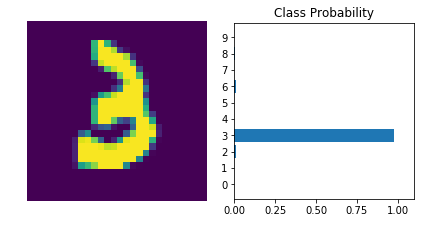

In [5]:
# load one batch
images, labels = next(iter(trainloader))

# Take first image
img = images[0].reshape(1, 784)

# Turn off gradients
with torch.no_grad():
    output = model.forward(img)
    
# take exp
probs = torch.exp(output)

# Visualize results with helper
helper.view_classify(img.view(1, 28, 28), probs)

## 5. Next steps
In the next notebook, we'll introduce a related dataset (fashion mnist) and built on what we have done so far. After fitting a neural network model for prediction we'll take one step further and use some methods like training curves for inference and validating the fit of the model on unseen data. Moreover, we'll use dropout to improve the generalizability of the model.  